IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

IMPORT DATASET

In [2]:
sales_data=pd.read_csv("C:\\Users\\bhush\\OneDrive\\Desktop\\advertising.csv")

In [3]:
sales_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [23]:
sales_data.shape

(200, 4)

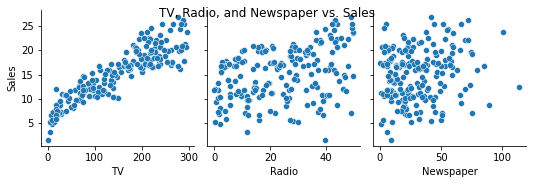

In [24]:
sns.pairplot(sales_data,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',kind='scatter')
plt.suptitle("TV, Radio, and Newspaper vs. Sales")
plt.show()


In [25]:
sales_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# Basic Observation from the summary of the data :

Avg expense spend is highest on TV as the mean expense on TV advertisements is 147.04 units

Avg expense spend is lowest on Radio as the mean expense on Radio is 23.26 units

Max sale is 27 ad min is 1.6


# Pair Plot Observation

<AxesSubplot:title={'center':'Histogram of TV advertisement costs'}, ylabel='Frequency'>

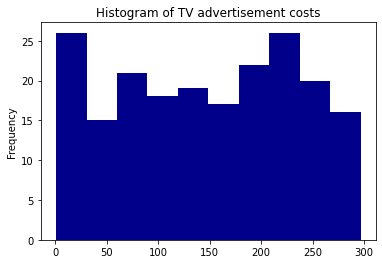

In [26]:
sales_data['TV'].plot.hist(bins=10,color='darkblue',title='Histogram of TV advertisement costs')

<AxesSubplot:title={'center':'Histogram of Radio Advertisements'}, ylabel='Frequency'>

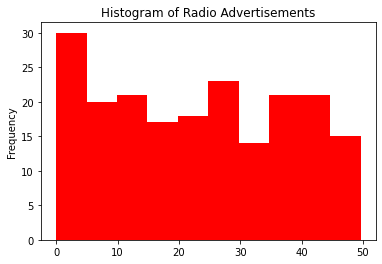

In [27]:

sales_data['Radio'].plot.hist(bins=10,color='red',title='Histogram of Radio Advertisements')




<AxesSubplot:title={'center':'Histogram of Newspaper Advertisement Expenses'}, ylabel='Frequency'>

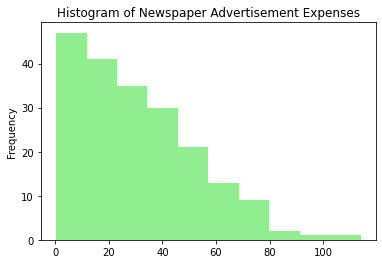

In [28]:
sales_data['Newspaper'].plot.hist(bins=10,color='lightgreen',title='Histogram of Newspaper Advertisement Expenses')

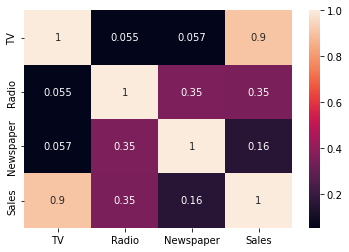

In [29]:
sns.heatmap(sales_data.corr(),annot=True)
plt.show()

# 
Correlation Heatmap

Correlation coefficient is a stastistical measure that indicates the strength and direction of tha linear relationship between two variables. It is a number between -1 and 1, where 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation.
Sales is highly correlated with tv as the correlation coefficients between sales TV is 0.9 which is close to 1

Lets train our model using linear regression as it is correlated with only one variable TV


In [30]:
#Train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(sales_data[['TV']],sales_data[['Sales']],test_size=0.3,random_state=0)

We have randomly splitted our whole dataset into two parts we have taken 70% of the random observations as training set which we will use to train our model and the remaining 30% of the observations will be used as test data which we will use to test our model.

In [31]:
x_train.shape

(140, 1)

In [32]:
#printing the training observation
print(x_train)

        TV
131  265.2
96   197.6
181  218.5
19   147.3
153  171.3
..     ...
67   139.3
192   17.2
117   76.4
47   239.9
172   19.6

[140 rows x 1 columns]


In [33]:
x_test.shape

(60, 1)

In [34]:
print(y_train)


     Sales
131   17.7
96    16.7
181   17.2
19    14.6
153   16.0
..     ...
67    13.4
192    5.9
117    9.4
47    23.2
172    7.6

[140 rows x 1 columns]


In [35]:
print(x_test)

        TV
18    69.2
170   50.0
107   90.4
98   289.7
177  170.2
182   56.2
5      8.7
146  240.1
12    23.8
152  197.6
61   261.3
125   87.2
180  156.6
154  187.8
80    76.4
7    120.2
33   265.6
130    0.7
37    74.7
74   213.4
183  287.6
145  140.3
45   175.1
159  131.7
60    53.5
123  123.1
179  165.6
185  205.0
122  224.0
44    25.1
16    67.8
55   198.9
150  280.7
111  241.7
22    13.2
189   18.7
129   59.6
4    180.8
83    68.4
106   25.0
134   36.9
66    31.5
26   142.9
113  209.6
168  215.4
63   102.7
8      8.6
75    16.9
118  125.7
143  104.6
71   109.8
124  229.5
184  253.8
97   184.9
149   44.7
24    62.3
30   292.9
160  172.5
40   202.5
56     7.3


In [36]:
print(y_test)

     Sales
18    11.3
170    8.4
107   12.0
98    25.4
177   16.7
182    8.7
5      7.2
146   18.2
12     9.2
152   16.6
61    24.2
125   10.6
180   15.5
154   20.6
80    11.8
7     13.2
33    17.4
130    1.6
37    14.7
74    17.0
183   26.2
145   10.3
45    16.1
159   12.9
60     8.1
123   15.2
179   17.6
185   22.6
122   16.6
44     8.5
16    12.5
55    23.7
150   16.1
111   21.8
22     5.6
189    6.7
129    9.7
4     17.9
83    13.6
106    7.2
134   10.8
66    11.0
26    15.0
113   20.9
168   17.1
63    14.0
8      4.8
75     8.7
118   15.9
143   10.4
71    12.4
124   19.7
184   17.6
97    20.5
149   10.1
24     9.7
30    21.4
160   16.4
40    16.6
56     5.5


Model Building

In [37]:
#Linear Regression
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [38]:
#indicing out the coefficients of the linear model
model.coef_

array([[0.05473199]])

In [39]:
model.intercept_

array([7.14382225])

In [40]:
0.05473199*69.2 + 7.14382225

10.931275958


Observatios:

We have considered linear regression model and have taken sales as our dependent variable(Response) and TV as our independent variable(Prediction).

\The model can also be written as

Sales=beta0+beta1 X TV

Now we know that Beta0=intercept of our model=7.14382225

and Beta1=coeffiecient of our model=0.05473199

So the model can be written as
Sales = 7.14382225 + 0.05473190 * TV

In [41]:
predicted=model.predict(x_test)
print(predicted)

[[10.93127621]
 [ 9.88042193]
 [12.09159447]
 [22.99968079]
 [16.45920756]
 [10.21976029]
 [ 7.6199906 ]
 [20.28497391]
 [ 8.4464437 ]
 [17.95886418]
 [21.44529217]
 [11.91645209]
 [15.71485245]
 [17.42249065]
 [11.32534656]
 [13.72260788]
 [21.68063975]
 [ 7.18213465]
 [11.23230217]
 [18.82362968]
 [22.88474361]
 [14.82272095]
 [16.72739433]
 [14.35202581]
 [10.07198391]
 [13.88133066]
 [16.20744039]
 [18.36388094]
 [19.40378881]
 [ 8.51759529]
 [10.85465142]
 [18.03001578]
 [22.50709285]
 [20.3725451 ]
 [ 7.86628457]
 [ 8.16731053]
 [10.40584907]
 [17.03936669]
 [10.88749061]
 [ 8.51212209]
 [ 9.16343282]
 [ 8.86788005]
 [14.96502414]
 [18.61564811]
 [18.93309367]
 [12.76479799]
 [ 7.6145174 ]
 [ 8.06879294]
 [14.02363385]
 [12.86878878]
 [13.15339515]
 [19.70481478]
 [21.03480222]
 [17.26376787]
 [ 9.59034237]
 [10.55362545]
 [23.17482317]
 [16.58509115]
 [18.22705095]
 [ 7.54336581]]


The residuals are completely random and does not follow and particular patern